<a href="https://colab.research.google.com/github/Desire4sorrow/Binary-Classification/blob/main/Binary_image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow import keras
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam, RMSprop

import matplotlib.pyplot as plt

vgg_conv = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))
vgg_conv.trainable=False
model = keras.Sequential()
model.add(vgg_conv)
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(1))  
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=1e-5),
	metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               2097408   
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
_________________________________________________________________
activation_3 (Activation)    (None, 1)                

In [3]:
from google.colab import drive
drive.mount('/data')
#Let's start by downloading our example data, a .zip of 2,000 JPG pictures of cats and dogs, and extracting it locally in /tmp.
#For this subject you need any permissions to make an access to your personal data. 



!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip
    

Mounted at /data
--2020-12-25 13:31:36--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.211.128, 173.194.213.128, 173.194.216.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.211.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   177MB/s    in 0.4s    

2020-12-25 13:31:37 (177 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



NOTE: The 2,000 images used in this exercise are excerpted from the "Dogs vs. Cats" dataset available on Kaggle, which contains 25,000 images. Here, we use a subset of the full dataset to decrease training time for educational purposes.

The contents of the .zip are extracted to the base directory /tmp/cats_and_dogs_filtered, which contains train and validation subdirectories for the training and validation datasets (see the Machine Learning Crash Course for a refresher on training, validation, and test sets), which in turn each contain cats and dogs subdirectories. Let's define each of these directories:

In [4]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

Let's see what the filenames look like in the cats and dogs train directories (file naming conventions are the same in the validation directory):

In [5]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

['cat.64.jpg', 'cat.179.jpg', 'cat.520.jpg', 'cat.381.jpg', 'cat.990.jpg', 'cat.597.jpg', 'cat.68.jpg', 'cat.631.jpg', 'cat.629.jpg', 'cat.745.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


Let's train on all 2,000 images available, for 15 epochs, and validate on all 1,000 validation images. (This may take a few minutes to run.)

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=10,
      validation_data=validation_generator,
      validation_steps=10,  # 1000 images = batch_size * steps
      verbose=2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
100/100 - 490s - loss: 0.6046 - accuracy: 0.6785 - val_loss: 0.5127 - val_accuracy: 0.7800
Epoch 2/10
100/100 - 482s - loss: 0.4653 - accuracy: 0.7815 - val_loss: 0.4206 - val_accuracy: 0.8500
Epoch 3/10
100/100 - 479s - loss: 0.3985 - accuracy: 0.8240 - val_loss: 0.3950 - val_accuracy: 0.8250
Epoch 4/10
100/100 - 480s - loss: 0.3478 - accuracy: 0.8610 - val_loss: 0.3681 - val_accuracy: 0.8400
Epoch 5/10
100/100 - 483s - loss: 0.3210 - accuracy: 0.8660 - val_loss: 0.3201 - val_accuracy: 0.8750
Epoch 6/10
100/100 - 486s - loss: 0.2945 - accuracy: 0.8855 - val_loss: 0.3252 - val_accuracy: 0.8650
Epoch 7/10
100/100 - 483s - loss: 0.2735 - accuracy: 0.8985 - val_loss: 0.2996 - val_accuracy: 0.8650
Epoch 8/10
100/100 - 484s - loss: 0.2607 - accuracy: 0.9045 - val_loss: 0.2716 - val_accuracy: 0.8900
Epoch 9/10
100/100 - 486s - loss: 0.2421 - accuracy: 0.9110 - val_loss: 0.2811 - val_accuracy: 0.9000
Epoch 10/10
100/100 - 482s - loss: 0.2328 - accuracy: 0.9135 - val_loss: 0.2869 - 

Let's summarise our results with using build-in libs of matplotlib.pyplot 

Imagination of accuracy shows how it can binary classificate image.

Imagination of loss shows how different types of accuraces trends to zero.


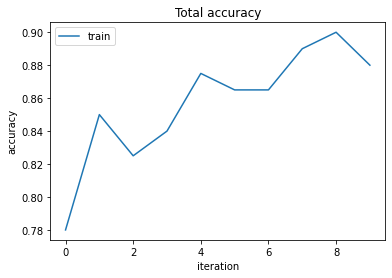

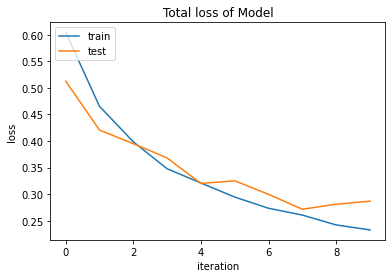

In [8]:
import matplotlib.pyplot as plt

#Making needed accuracy as graphical imagination

plt.plot(history.history['val_accuracy'])
plt.title('Total accuracy')
plt.ylabel('accuracy')
plt.xlabel('iteration')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Making needed loss as graphical imagination

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Total loss of Model')
plt.ylabel('loss')
plt.xlabel('iteration')
plt.legend(['train', 'test'], loc='upper left')
plt.show()